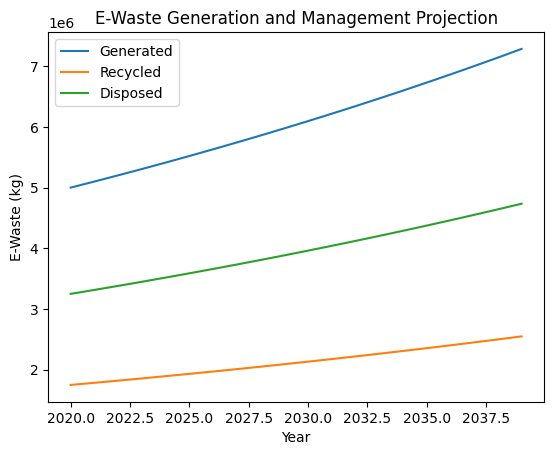

In [1]:
import numpy as np
import matplotlib.pyplot as plt

years = np.arange(2020, 2040)
population = 1_000_000  # starting population
growth_rate = 0.02
e_waste_per_person = 5  # kg per person per year
recycling_efficiency = 0.35  # 35% recycled

e_waste_generated = []
e_waste_recycled = []
e_waste_disposed = []

for year in years:
    waste = population * e_waste_per_person
    recycled = waste * recycling_efficiency
    disposed = waste - recycled

    e_waste_generated.append(waste)
    e_waste_recycled.append(recycled)
    e_waste_disposed.append(disposed)
    population *= (1 + growth_rate)

plt.plot(years, e_waste_generated, label='Generated')
plt.plot(years, e_waste_recycled, label='Recycled')
plt.plot(years, e_waste_disposed, label='Disposed')
plt.title("E-Waste Generation and Management Projection")
plt.xlabel("Year")
plt.ylabel("E-Waste (kg)")
plt.legend()
plt.show()


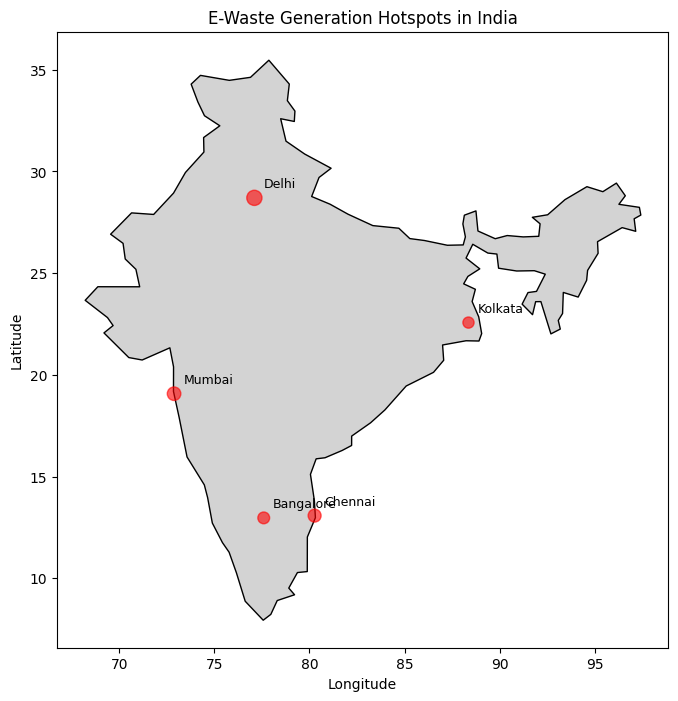

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Example e-waste data (replace with your own)
data = {
    'City': ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bangalore'],
    'Longitude': [77.1025, 72.8777, 80.2707, 88.3639, 77.5946],
    'Latitude': [28.7041, 19.0760, 13.0827, 22.5726, 12.9716],
    'E_Waste_Tons': [120000, 95000, 87000, 65000, 72000]
}
df = pd.DataFrame(data)

# ✅ Download Natural Earth data directly
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
india = gpd.read_file(url)
india = india[india['ADMIN'] == 'India']

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
india.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot cities
df_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)
df_gdf.plot(ax=ax, markersize=df['E_Waste_Tons'] / 1000, color='red', alpha=0.6)

for x, y, label in zip(df.Longitude, df.Latitude, df.City):
    plt.text(x + 0.5, y + 0.5, label, fontsize=9)

plt.title("E-Waste Generation Hotspots in India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


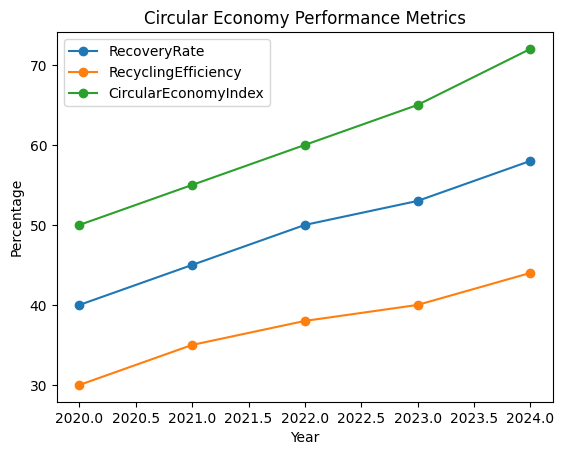

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Year': [2020, 2021, 2022, 2023, 2024],
    'RecoveryRate': [40, 45, 50, 53, 58],
    'RecyclingEfficiency': [30, 35, 38, 40, 44],
    'CircularEconomyIndex': [50, 55, 60, 65, 72]
}

df = pd.DataFrame(data)
df.set_index('Year').plot(marker='o', title='Circular Economy Performance Metrics')
plt.ylabel("Percentage")
plt.show()


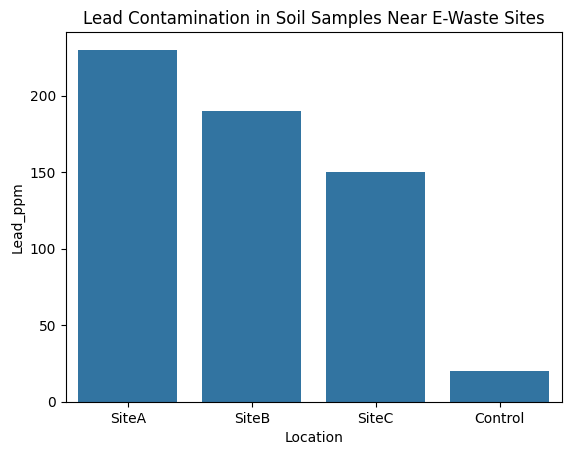

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
data = {
    'Location': ['SiteA', 'SiteB', 'SiteC', 'Control'],
    'Lead_ppm': [230, 190, 150, 20],
    'Cadmium_ppm': [7.5, 6.8, 4.3, 0.3],
    'Mercury_ppm': [2.1, 1.8, 1.2, 0.1]
}
df = pd.DataFrame(data)

sns.barplot(x='Location', y='Lead_ppm', data=df)
plt.title("Lead Contamination in Soil Samples Near E-Waste Sites")
plt.show()


In [10]:
import pandas as pd

data = {
    'Metal': ['Lead', 'Cadmium', 'Mercury'],
    'Concentration_ppm': [0.12, 0.03, 0.008],
    'ReferenceDose': [0.004, 0.001, 0.0003]  # mg/kg/day
}

df = pd.DataFrame(data)
df['HazardQuotient'] = df['Concentration_ppm'] / df['ReferenceDose']
df['RiskLevel'] = df['HazardQuotient'].apply(lambda x: 'High' if x > 1 else 'Low')
print(df)


     Metal  Concentration_ppm  ReferenceDose  HazardQuotient RiskLevel
0     Lead              0.120         0.0040       30.000000      High
1  Cadmium              0.030         0.0010       30.000000      High
2  Mercury              0.008         0.0003       26.666667      High
